
# 项目：调查电影数据集

## 目录
<ul>
<li><a href="调查电影数据集">简介</a></li>
<li><a href="电影数据整理">数据整理</a></li>
<li><a href="电影数据探索">探索性数据分析</a></li>
<li><a href="电影票房高的特点有哪些">结论</a></li>
</ul>

<a id='intro'></a>
## 简介
本数据集里包含了从1960年到2015年上映的各种类型的电影的数据情况，信息来源为“电影数据库”，包括用户评分和票房,“演职人员 (cast)”、“电影类别 ”等数据,我以此数据为准,进行了两个方面的数据分析: 

**研究问题**

1.上映的电影平均评分在总体上呈现怎样的趋势? 

2.最受欢迎的电影有什么特点?

我将根据以上的问题对数据集进行相应的数据清洗工作，并对数据进行适当的可视化处理得出结论，以完成这个项目。


In [1]:
# 导入语句。
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline 

In [2]:
# 读取数据并简单查看数据情况
df =pd.read_csv('movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


<a id='wrangling'></a>
## 数据整理

> **提示**：在这一部分中，检查数据简洁度，然后整理和清理数据集，以便进行分析。

### 常规属性
> **提示**：对数据的冗余,缺失,数据结构进行处理

In [4]:
# 查看数据的行列数
df.shape

(10866, 21)

In [5]:
#  查看数据集结构和空值情况
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [7]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [8]:
# 查看数据冗余情况
df.duplicated().sum()

1

### 数据呈现的问题
     1.数据缺失情况存在,并且某些列存在很大的数据缺失

     2.有少量的数据冗余情况

     3.存在一些对于研究问题无关的列数据集存在,影响数据集的整体简洁性

### 数据清理

In [10]:
# 删除冗余数据
df.drop_duplicates(inplace =True)

In [11]:
# 验证删除后的效果,确保删除成功
df.shape

(10865, 21)

In [13]:
# 删除无关项与数据缺失项目
df.drop(['homepage','homepage','tagline','production_companies','budget_adj','revenue_adj'],axis=1,inplace = True)

In [14]:
# 确认处理效果
df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,keywords,overview,runtime,genres,release_date,vote_count,vote_average,release_year
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015


In [16]:
df.isnull().sum()

id                   0
imdb_id             10
popularity           0
budget               0
revenue              0
original_title       0
cast                76
director            44
keywords          1493
overview             4
runtime              0
genres              23
release_date         0
vote_count           0
vote_average         0
release_year         0
dtype: int64

<a id='eda'></a>
## 探索性数据分析

> **提示**在完成数据整理和清理之后，现在可以进行探索性数据分析了。

### 研究问题 1 上映的电影平均评分在总体上呈现怎样的趋势?

In [18]:
import seaborn as sns
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'director', 'keywords', 'overview', 'runtime', 'genres',
       'release_date', 'vote_count', 'vote_average', 'release_year'],
      dtype='object')

Text(0.5,0,'vote_avrage')

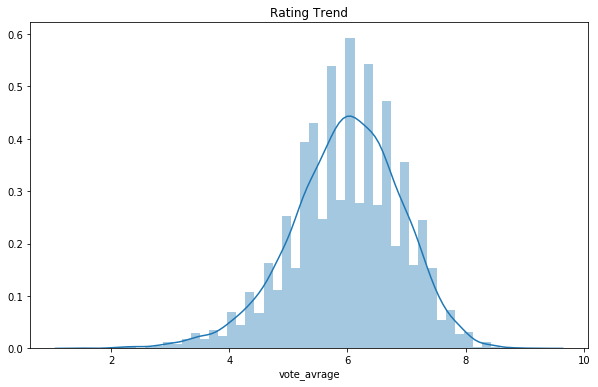

In [20]:
vote_average_plot,axes =plt.subplots(nrows=1,ncols=1,figsize=(10,6))
sns.distplot(df['vote_average'])
plt.title('Rating Trend')
plt.xlabel('vote_avrage')

### 结论
1.从上述图形来看,整个电影数据中,评分在5.5-6.5分之间的最多,4分以下和8分以上占比较少

2.通过以上的数据删重,去除空值等整理对于电影的评分并没有直接的影响,因为从上面的空值查询来看,电影评分这一块并不存在空值,这就能从整体上体现出这整组数据的趋势

### 研究问题 2 最受欢迎的电影有什么特点?

#### 选择'genres'变量来分析分析趋势原因?

    1. 'genres'该变量记录的是每部上映电影的风格情况,对该变量运用直方图的直观形式展示出来,可以更加清楚的分析出上映电影的总体评分情况是怎样的 -
    
    2. 'genres'列的数据显示有23个缺失值,这些缺失值相对于26955(拆分后)的总数来说,对于总体的影响很小,故没有对这些缺失值进行处理

In [24]:
# 拆分genres 数据
df['genres'].str.split('|',expand=True)
df['genres'].str.split('|',expand=True).stack()
t = df['genres'].str.split('|',expand=True).stack().reset_index(level=1,drop=True).rename('new_genre')
a = df.join(t)

In [26]:
a.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26978 entries, 0 to 10865
Data columns (total 17 columns):
id                26978 non-null int64
imdb_id           26953 non-null object
popularity        26978 non-null float64
budget            26978 non-null int64
revenue           26978 non-null int64
original_title    26978 non-null object
cast              26853 non-null object
director          26885 non-null object
keywords          23639 non-null object
overview          26972 non-null object
runtime           26978 non-null int64
genres            26955 non-null object
release_date      26978 non-null object
vote_count        26978 non-null int64
vote_average      26978 non-null float64
release_year      26978 non-null int64
new_genre         26955 non-null object
dtypes: float64(2), int64(6), object(9)
memory usage: 3.7+ MB


In [29]:
# 计算出 new_genre 的每一行的唯一值数量
a.new_genre.value_counts()

Drama              4760
Comedy             3793
Thriller           2907
Action             2384
Romance            1712
Horror             1637
Adventure          1471
Crime              1354
Family             1231
Science Fiction    1229
Fantasy             916
Mystery             810
Animation           699
Documentary         520
Music               408
History             334
War                 270
Foreign             188
TV Movie            167
Western             165
Name: new_genre, dtype: int64

Text(0,0.5,'Quantity')

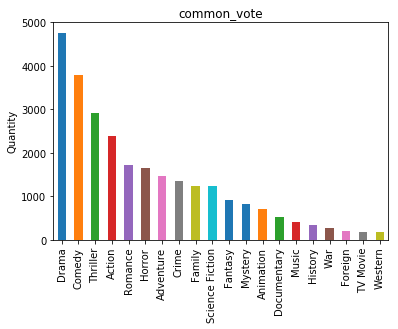

In [31]:
# 根据数量绘制图形
a.new_genre.value_counts().plot(kind='bar',title ='common_vote')
plt.ylabel('Quantity')

### 结论
    1. 由上图可以看出,'drama'特点的电影类型最多,'western'电影最少 
    
    2. 虽然该数据总共达到了6987项,但是只是单独的分析了'genres'的特点,并没有和电影的收入相关联,故在此点上有一定的局限性和缺乏一些实用性